In [1]:
#from __future__ import division
import seaborn as sns
import cPickle as pickle

/home/ankdesh/installed/anaconda/envs/nanodegree/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
class Stats(object):
    def __init__(self):
        self.stats = [] # Keeps all stats for each episode
        self.cntNegreward = 0    # Number of negative rewards (bad driving) in this trial
        self.lastDeadLineVal = 0 # Value of the deadline last time the agent was run. 1 means agent did not meet deadline

    def reset(self):
        self.stats.append((self.lastDeadLineVal, self.cntNegreward))
        self.cntNegreward = 0
        self.lastDeadLineVal = 0

In [20]:
# Extracts the time left when goal was reached (0 means deadline was over)
def getLastDeadLineData(pickleFile):
    statData = pickle.load(open(pickleFile))
    lastDeadlineData = [1 if x[0] > 0 else 0 for x in statData.stats] 
    return lastDeadlineData

# Sums a list over n consecutive values 
def downsampleList(arr, n):
    retList = []
    for i in xrange(len(arr)/n):
        retList.append(sum(arr[i*n:(i+1)*n]) * 100.0 / n)
    return retList

In [21]:
goalReachedRandomPolicy = getLastDeadLineData('../random_policy_learning.pickle')
goalReachedQLearning = getLastDeadLineData('../qlearning_policy_learning.pickle')

In [22]:
print downsampleList(goalReachedQLearning,5)

[80.0, 100.0, 100.0, 80.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 80.0, 100.0, 100.0]


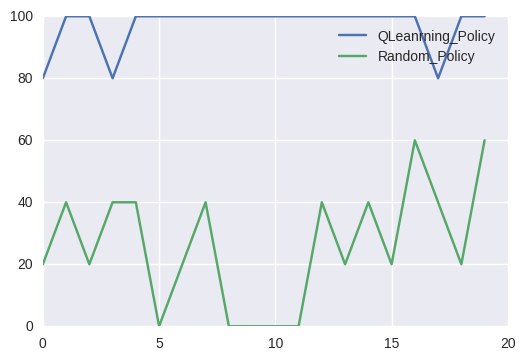

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(downsampleList(goalReachedQLearning,5),label = 'QLeanrning_Policy')
plt.plot(downsampleList(goalReachedRandomPolicy,5),label = 'Random_Policy')
plt.legend()